Question 2

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('/content/Credit card.csv')

fraud_count = dataset['Class'].value_counts()[1]
total_count = dataset['Class'].value_counts()[0] + fraud_count
fraud_percentage = fraud_count / total_count * 100
print('Percentage of fraudulent transactions: {:.2f}%'.format(fraud_percentage))


Percentage of fraudulent transactions: 0.23%


Question 3

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
print(X.shape, y.shape)


(1000, 20) (1000,)


In [ ]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.806 (0.041)


In [ ]:
# make predictions using adaboost for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.47224758,1.95378146,0.04875169,-0.91592588,-3.54022468,1.96405547,-7.72564954,-2.64787168,-1.81726906,-1.67104974,2.33762043,-4.30273117,0.4839841,-1.28253034,-10.6704077,-0.7641103,-3.58493721,2.07283886,0.08385173,0.91461126]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


>10 0.773 (0.039)
>50 0.806 (0.041)
>100 0.801 (0.032)
>500 0.793 (0.028)
>1000 0.792 (0.031)
>5000 0.779 (0.030)


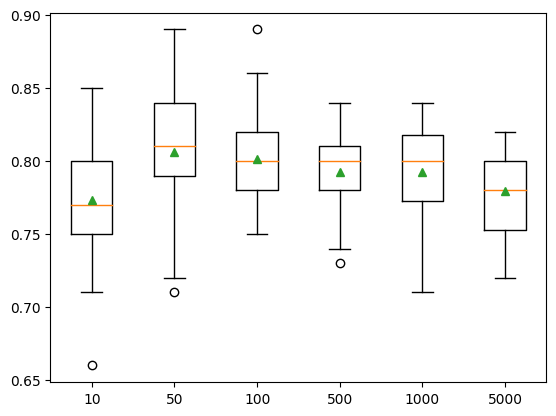

In [ ]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.806 (0.041)
>2 0.863 (0.028)
>3 0.869 (0.029)
>4 0.892 (0.033)
>5 0.908 (0.028)
>6 0.922 (0.027)
>7 0.926 (0.021)
>8 0.929 (0.027)
>9 0.928 (0.027)
>10 0.927 (0.024)


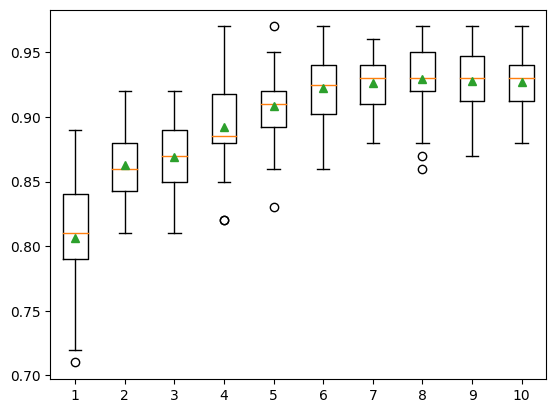

In [ ]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.100 0.767 (0.049)
>0.200 0.786 (0.042)
>0.300 0.802 (0.040)
>0.400 0.798 (0.037)
>0.500 0.805 (0.042)
>0.600 0.795 (0.031)
>0.700 0.799 (0.035)
>0.800 0.801 (0.033)
>0.900 0.805 (0.032)
>1.000 0.806 (0.041)
>1.100 0.801 (0.037)
>1.200 0.800 (0.030)
>1.300 0.799 (0.041)
>1.400 0.793 (0.041)
>1.500 0.790 (0.040)
>1.600 0.775 (0.034)
>1.700 0.767 (0.054)
>1.800 0.768 (0.040)
>1.900 0.736 (0.047)
>2.000 0.682 (0.048)


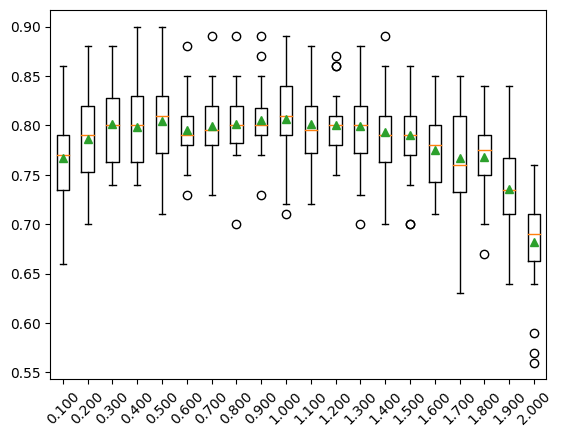

In [ ]:
# explore adaboost ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [ ]:
# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813667 using {'learning_rate': 0.1, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.647000 (0.038136) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646667 (0.036545) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.647000 (0.038136) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.654333 (0.045511) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.672667 (0.046543) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.648333 (0.042197) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.671667 (0.045613) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.715000 (0.053213) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.767667 (0.045948) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.716667 (0.048876) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.767000